In [2]:
#imports
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

In [3]:
#Machine Learning imports 
from sklearn.ensemble import RandomForestClassifier

In [4]:
#Load Test & Training Data Sets
train_DF = pd.read_csv("/Users/sominwadhwa/Desktop/Kaggle/Titanic/train.csv", dtype = {"Age": np.float64}, )
test_DF = pd.read_csv("/Users/sominwadhwa/Desktop/Kaggle/Titanic/test.csv", dtype = {"Age": np.float64}, )

In [5]:
#Visualizing Data (First n-rows)
train_DF.head(n = 4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [6]:
print("------Training Data Information-------\n")
train_DF.info()
print("\n\n------Test Data Information-------\n")
test_DF.info()

------Training Data Information-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


------Test Data Information-------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-n

In [7]:
#Dropping data irrelevant to analysis
train_DF = train_DF.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = False)
test_DF = test_DF.drop(['Name','Ticket'], axis = 1, inplace = False)

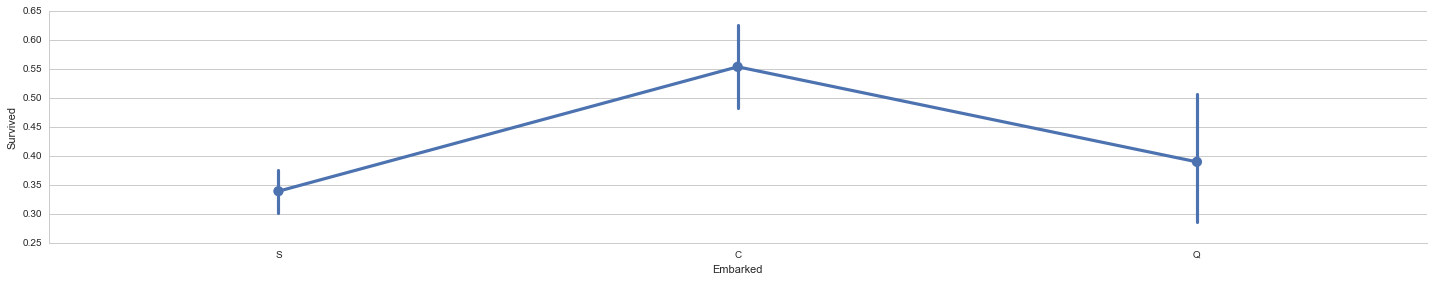

In [8]:
#Creating Dummy Plots based on 'Embarked'
train_DF['Embarked'] = train_DF['Embarked'].fillna('S')
sns.factorplot(x = 'Embarked', y = 'Survived', data=train_DF, size = 4, aspect = 5)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


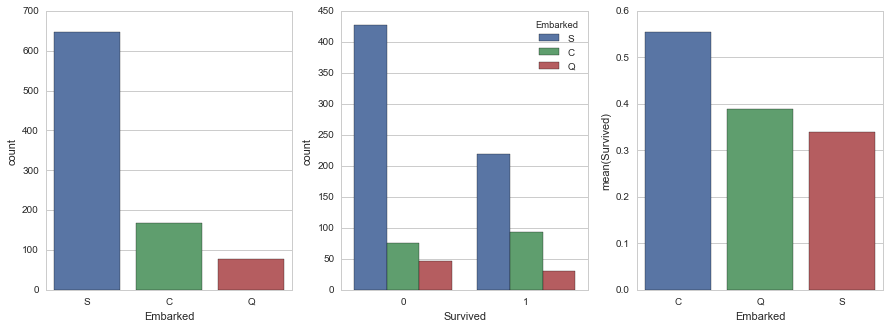

In [9]:
figure, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Embarked', data = train_DF, ax = ax1)
sns.countplot(x = 'Survived', hue = 'Embarked', data = train_DF, ax = ax2)
embark_perc = train_DF[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,ax=ax3)
embark_perc.head()

In [10]:
#Introducing dummies for Embarked
embark_dummy = pd.get_dummies(train_DF['Embarked'])
train_DF = train_DF.join(embark_dummy) #May or may not choose to drop 'S' here (Due to lower chances of survival)
embark_dummy_test = pd.get_dummies(test_DF['Embarked'])
test_DF = test_DF.join(embark_dummy_test)

train_DF.drop(['Embarked'], axis = 1, inplace = True)
test_DF.drop(['Embarked'], axis = 1, inplace = True)
train_DF['C'] = train_DF['C'].astype(int)
train_DF['Q'] = train_DF['Q'].astype(int)
train_DF['S'] = train_DF['S'].astype(int)
train_DF['C'] = train_DF['C'].astype(int)
train_DF['Q'] = train_DF['Q'].astype(int)
train_DF['S'] = train_DF['S'].astype(int)
train_DF.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,C,Q,S
0,0,3,male,22.0,1,0,7.2500,NaN,0,0,1
1,1,1,female,38.0,1,0,71.2833,C85,1,0,0
2,1,3,female,26.0,0,0,7.9250,NaN,0,0,1
3,1,1,female,35.0,1,0,53.1000,C123,0,0,1
4,0,3,male,35.0,0,0,8.0500,NaN,0,0,1


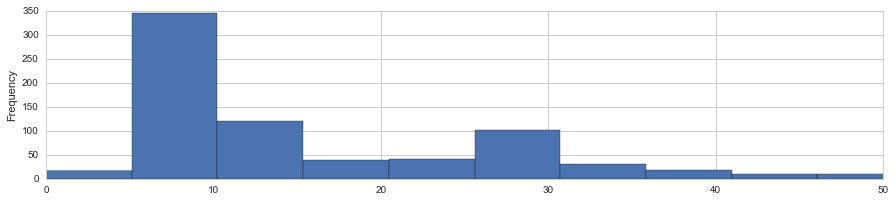

In [11]:
#Feature: Fare 
""" Since fare is one such obvious feature it is 
safe to say to include in the feature without much
thought """
#Perform Cleanup
test_DF['Fare'].fillna(test_DF['Fare'].median(), inplace = True)
train_DF['Fare'] = train_DF['Fare'].astype(int)
test_DF['Fare'] = test_DF['Fare'].astype(int)
#Fetch Fare Information
survived_fare = train_DF['Fare'][train_DF['Survived'] == 1]
not_survived_fare = train_DF['Fare'][train_DF['Survived'] == 0]
#Extract Metrics
get_avg_fare = DataFrame([survived_fare.mean(), not_survived_fare.mean()])
get_std_fare = DataFrame([survived_fare.std(), not_survived_fare.std()])
#Plot
train_DF['Fare'].plot(kind = 'hist', figsize = (15,3), bins = 100, xlim = (0,50))